In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [ ]:
df=df.drop(columns=['Cabin'])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,197
SibSp,0
Parch,0
Ticket,0
Fare,18


In [11]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
# Extracting Title from Name as new feature
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [14]:

# --- Fix Pclass column if it contains strings like '1st', '2nd', '3rd ' ---
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)              # convert to numeric


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Encode categorical features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])


In [18]:

# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

X = df[features]
y = df[target]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (629, 7), Validation: (135, 7), Test: (135, 7)


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:

"""**Model Training: K-Nearest Neighbors**"""

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score


Confusion Matrix:


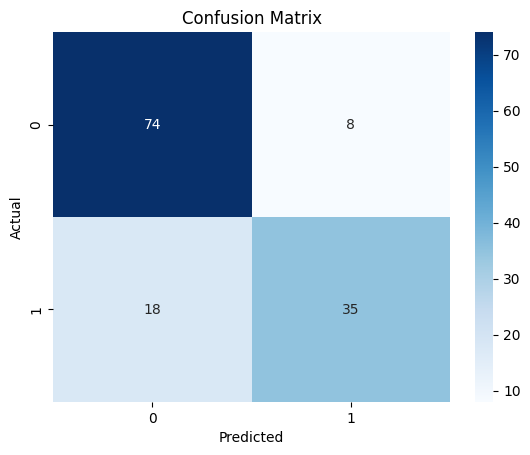

In [31]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
acc = accuracy_score(y_test, y_pred)

In [33]:

prec = precision_score(y_test, y_pred)

In [34]:

rec = recall_score(y_test, y_pred)

In [35]:

f1 = f1_score(y_test, y_pred)

In [ ]:
df['Fare']=df['Fare'].fillna(df['Fare'].median(0))

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [38]:
categorical_cols = df.select_dtypes(include='object').columns
print(" Categorical inconsistencies standardized.\n")
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    display(df[col].unique())

 Categorical inconsistencies standardized.

Unique values in 'Name':


array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

Unique values in 'Ticket':


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Unique values in 'Cabin':


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
roc = roc_auc_score(y_test, y_pred)

In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.81      0.66      0.73        53

    accuracy                           0.81       135
   macro avg       0.81      0.78      0.79       135
weighted avg       0.81      0.81      0.80       135



In [41]:
sample_passenger = pd.DataFrame(
    [[2, 0, 30, 20.5, 1, 0, 1]],
    columns=X.columns
)

sample_passenger_scaled = scaler.transform(sample_passenger)


In [42]:
predicted_survival = knn.predict(sample_passenger_scaled)



In [43]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [44]:
X_test_scaled = scaler.transform(X_test_df)

In [45]:
y_pred_test = knn.predict(X_test_scaled)

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    # Replace negative values with NaN
    df.loc[df[col] < 0, col] = None

    # Example: handle out-of-range for Age
    if col == 'age':
        df.loc[(df[col] <= 0) | (df[col] > 100), col] = None

In [ ]:
print("Numeric inconsistencies handled.\n")
print("Statistics after numeric corrections:")
display(df[numeric_cols].describe())

Numeric inconsistencies handled.

Statistics after numeric corrections:


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,445.378198,0.385984,29.316185,0.520578,0.381535,30.997988
std,256.907312,0.487098,12.895859,1.098880,0.805143,46.643980
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.925000
50%,444.000000,0.000000,28.000000,0.000000,0.000000,13.862500
75%,667.500000,1.000000,35.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print("\n Missing values after handling inconsistencies:")
display(df.isnull().sum())


 Missing values after handling inconsistencies:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Sex'] = (
    df['Sex']
    .astype(str)                     # convert non-strings to string
    .str.strip()                     # remove spaces
    .str.lower()                     # make lowercase for mapping
    .map({
        'male': 'Male',
        'm': 'Male',
        'female': 'Female',
        'f': 'Female'
    })
)

In [ ]:
print("Cleaned 'Sex' column:")
display(df['Sex'])

Cleaned 'Sex' column:


,Sex
0,Male
1,Female
2,Female
3,Female
4,Male
...,...
899,Female
900,Female
904,Male
905,Male


In [ ]:
df['Embarked'] = (
    df['Embarked']
    .astype(str)
    .str.strip()
    .str.upper()
    .map({
        'S': 'S',
        'C': 'C',
        'Q': 'Q',
        'SOUTHAMPTON': 'S',
        'CHERBOURG': 'C',
        'QUEENSTOWN': 'Q'
    })
)

In [ ]:
display(df['Embarked'])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
899,Q
900,S
904,C
905,S


outliar

In [46]:
# Accuracy
acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {acc:.3f}")

Test Accuracy: 0.607


In [47]:
# Detailed Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        82
           1       0.50      0.13      0.21        53

    accuracy                           0.61       135
   macro avg       0.56      0.52      0.47       135
weighted avg       0.57      0.61      0.53       135

